In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
X, y = make_blobs(n_samples=10, random_state=1, centers=2, n_features=2)
y[y == 0] = -1
print(X,y)

[[-10.17014071  -4.83120697]
 [-11.09833168  -2.80862484]
 [ -9.95549876  -3.37053333]
 [ -8.86394306  -5.05323981]
 [  0.08525186   3.64528297]
 [ -0.79415228   2.10495117]
 [ -1.34052081   4.15711949]
 [-10.32012971  -4.3374029 ]
 [ -2.18773166   3.33352125]
 [ -0.19745197   2.34634916]] [ 1  1  1  1 -1 -1 -1  1 -1 -1]


(10, 2)
(10,)


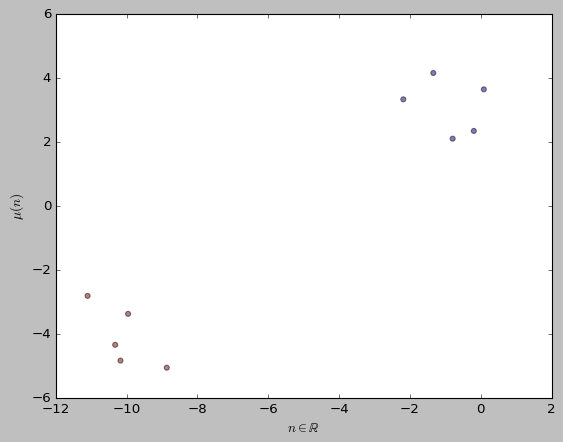

In [ ]:
plt.xlabel('$n \in \mathbb{R}$')
plt.ylabel('$\mu(n)$')
print(np.shape(X))
print(np.shape(y))
plt.scatter(X.T[0], X.T[1], c=y+1, alpha=.5);

In [ ]:
y = y.reshape(-1, 1)*1.  #to float
print(y)
print(np.shape(y))

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]]
(10, 1)


In [ ]:
X_new=np.vstack([np.ones(len(X)),np.sqrt(2)*X[:,0],np.sqrt(2)*X[:,1],np.square(X[:,0]),np.square(X[:,1]),np.sqrt(2)*X[:,0]*X[:,1]])
print(X_new.shape)
PhiX=np.transpose(X_new)
print(PhiX.shape)

(6, 10)
(10, 6)


In [ ]:
from cvxopt import matrix as cvxoptMatrix
from cvxopt import solvers as cvxoptSolvers

m, n = PhiX.shape
print(m,n)
# print(Xbar)
H = np.dot((y * PhiX), (y * PhiX).T)
print((y * PhiX))
print((y * PhiX).shape,H.shape)
P = cvxoptMatrix(H)
# print("H = ",H)
q = cvxoptMatrix(-np.ones((m, 1)))
# print("q =",q)
h = cvxoptMatrix(np.zeros(m))
# print("h =",h)
A = cvxoptMatrix(y.reshape(1, -1))
# print("A =",A)
b = cvxoptMatrix(np.zeros(1))
# print("b =",b)
G = cvxoptMatrix(-np.eye(m))
# print("G =",G)

cvxoptSolvers.options['show_progress'] = True
sol = cvxoptSolvers.qp(P, q, G, h, A, b)

10 6
[[ 1.00000000e+00 -1.43827509e+01 -6.83235841e+00  1.03431762e+02
   2.33405607e+01  6.94860464e+01]
 [ 1.00000000e+00 -1.56954112e+01 -3.97199534e+00  1.23172966e+02
   7.88837348e+00  4.40825217e+01]
 [ 1.00000000e+00 -1.40792014e+01 -4.76665395e+00  9.91119555e+01
   1.13604950e+01  4.74544175e+01]
 [ 1.00000000e+00 -1.25355085e+01 -7.14636028e+00  7.85694866e+01
   2.55352326e+01  6.33449306e+01]
 [-1.00000000e+00 -1.20564334e-01 -5.15520861e+00 -7.26787934e-03
  -1.32880879e+01 -4.39491114e-01]
 [-1.00000000e+00  1.12310092e+00 -2.97685050e+00 -6.30677838e-01
  -4.43081944e+00  2.36407260e+00]
 [-1.00000000e+00  1.89578271e+00 -5.87905477e+00 -1.79699604e+00
  -1.72816425e+01  7.88099526e+00]
 [ 1.00000000e+00 -1.45948674e+01 -6.13401401e+00  1.06505077e+02
   1.88130639e+01  6.33038202e+01]
 [-1.00000000e+00  3.09391978e+00 -4.71431096e+00 -4.78616981e+00
  -1.11123639e+01  1.03136473e+01]
 [-1.00000000e+00  2.79239252e-01 -3.31823880e+00 -3.89872800e-02
  -5.50535438e+00  6

In [ ]:
print(sol)
alphas = np.array(sol['x'])
bias = np.array(sol['y'])
print(alphas,bias)
print(alphas.shape,bias.shape)

{'x': <10x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <10x1 matrix, tc='d'>, 'z': <10x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.6803395366365052e-09, 'relative gap': 8.897955860077157e-06, 'primal objective': -0.00018884556892170674, 'dual objective': -0.00018884724926124334, 'primal infeasibility': 4.3913364359215133e-20, 'dual infeasibility': 2.4882994615061083e-16, 'primal slack': 3.0652181162877543e-10, 'dual slack': 1.0414634521287785e-06, 'iterations': 7}
[[3.72512354e-10]
 [3.06521812e-10]
 [1.58044012e-09]
 [1.88843802e-04]
 [1.88838010e-04]
 [2.64848126e-09]
 [1.40308628e-09]
 [3.48060331e-10]
 [1.93101781e-09]
 [2.41668334e-09]] [[-1.02380089]]
(10, 1) (1, 1)


In [ ]:
print(y.shape,alphas.shape,(y*alphas).shape,PhiX.shape)
w = ((y * alphas).T @ PhiX).reshape(-1,1)
print(((y * alphas).T @ PhiX).shape)
print(w,w.shape)
print(bias,bias.shape)

(10, 1) (10, 1) (10, 1) (10, 6)
(1, 6)
[[-4.39133644e-20]
 [-2.39004542e-03]
 [-2.32309186e-03]
 [ 1.48362446e-02]
 [ 2.31283920e-03]
 [ 1.18794801e-02]] (6, 1)
[[-1.02380089]] (1, 1)


In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
test_data=np.c_[xx.ravel(), yy.ravel()]
def project_test(test_data):
  test_new=np.vstack([np.ones(len(test_data)),np.sqrt(2)*test_data[:,0],np.sqrt(2)*test_data[:,1],np.square(test_data[:,0]),np.square(test_data[:,1]),np.sqrt(2)*test_data[:,0]*test_data[:,1]])
  print(test_new.shape)
  PhiX_test=np.transpose(test_new)
  print(PhiX_test.shape)
  return PhiX_test

projected_test_data=project_test(test_data)

print(w.shape)
print(projected_test_data.shape)
test_prediction = projected_test_data @ w + bias
print(test_prediction.shape)

(6, 370260)
(370260, 6)
(6, 1)
(370260, 6)
(370260, 1)


In [ ]:
Test_predictions=np.sign(test_prediction)


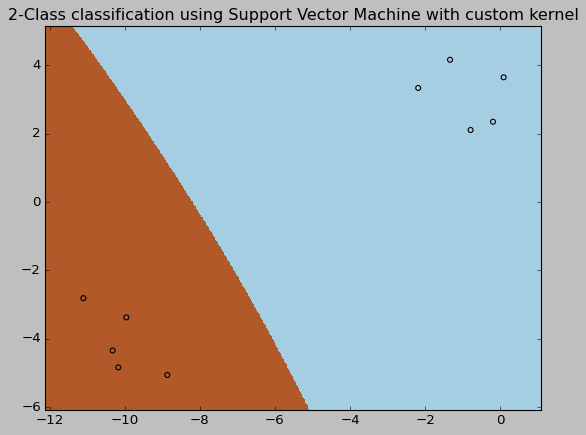

In [ ]:
Z = Test_predictions.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("2-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()